In [1]:
import numpy as np
import h5py
import PIL
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = h5py.File("datasets/train_catvnoncat.h5","r")
test = h5py.File("datasets/test_catvnoncat.h5","r")
print(train.keys())

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>


In [3]:
images_train = np.array(train["train_set_x"][:])
labels_train = np.array(train["train_set_y"][:]).reshape(1,-1)
images_test = np.array(test["test_set_x"][:])
labels_test = np.array(test["test_set_y"][:]).reshape(1,-1)

In [4]:
print(f" shape images_train : {images_train.shape} \n shape labels_train : {labels_train.shape} \n shape images_test : {images_test.shape}\n shape labels_test : {labels_test.shape}")

 shape images_train : (209, 64, 64, 3) 
 shape labels_train : (1, 209) 
 shape images_test : (50, 64, 64, 3)
 shape labels_test : (1, 50)


In [5]:
images_train_m = images_train.T.reshape(images_train.shape[1]*images_train.shape[2]*images_train.shape[3],-1)
images_test_m = images_test.T.reshape(images_test.shape[1]*images_test.shape[2]*images_test.shape[3],-1)

In [6]:
print(f" shape images_train_m : {images_train_m.shape} \n shape labels_train_m : {images_test_m.shape}")

 shape images_train_m : (12288, 209) 
 shape labels_train_m : (12288, 50)


In [7]:
images_train_sm = (images_train_m/255.).astype("float32")
images_test_sm = (images_test_m/255.).astype("float32")

In [8]:
def sigmoid(x , derivative=False):
  if not derivative:
    return (1/(1+np.exp(-x))).reshape(x.shape)
  else :
    return (sigmoid(x)*(1-sigmoid(x)))

In [9]:
def tanh(x,derivative=False):
  if not derivative:
    return np.tanh(x).reshape(x.shape)
  else:
    return (1-np.power((np.tanh(x)),2)).reshape(x.shape)

In [10]:
def relu(x,derivative=False):
  shape = x.shape
  x = np.array(x).reshape(shape)
  if not derivative:
    x[x<0] = 0
    return x
  else:
    x[x>=0] = 1
    x[x<0] = 0
    return x

In [11]:
def leaky_relu(x , derivative=False):
  shape = x.shape
  x = np.array(x).reshape(shape)
  x = x.astype("float32")
  if not derivative:
    x[x<0] = 0.01*x[x<0]
    return x
  else :
    x[x >= 0] = 1
    x[x<0] = 0.01
    return x

In [12]:
# Y=np.array([1,2,3])
# A2 = np.array([4,5,6])
# ans=-(Y/A2)-((1-Y)/(1-A2))

In [13]:
#((1-Y)/(1-A2))

In [14]:
# X = np.random.randn(12288,10)
# Y = (np.random.randn(10)>=0.5)*1
# W1 , b1 ,W2,b2 = first_random_initialize(3,1)

In [15]:
# X= images_train_sm
# Y = labels_train.reshape(1,209)
# m = X.shape[1]
# Z1 = np.dot(W1,X) + b1
# A1 = sigmoid(Z1)
# Z2 = np.dot(W2,A1) + b2
# A2 = sigmoid(Z2)
# cost = np.sum(-Y*np.log(A2)-(1-Y)*np.log(1-A2))/m
# dA2 = -(Y*(1/A2))-((1-Y)*(1/(1-A2)))
# # dZ2 = dA2 * activation2(Z2,True)
# # dW2 = np.dot(dZ2,A1.T)/m
# # db2 = np.sum(dZ2,axis=1,keepdims=True)/m
# # dZ1 = np.dot(W2.T,dZ2)*activation1(Z1,True)

In [16]:
# dA2.shape

In [17]:
#grad , cost = propagate(images_train_sm,W1,b1,W2,b2,labels_train,sigmoid,sigmoid)

In [18]:
def propagate(X,W1,b1,W2,b2,Y,activation1,activation2):
  m = X.shape[1]
  Z1 = np.dot(W1,X) + b1
  A1 = activation1(Z1)
  Z2 = np.dot(W2,A1) + b2
  A2 = activation2(Z2)
  cost = np.sum(-Y*np.log(A2)-(1-Y)*np.log(1-A2))/m
  dA2 = -(Y/A2)-((1-Y)/(1-A2))
  dZ2 = dA2 * activation2(Z2,True)
  dW2 = np.dot(dZ2,A1.T)/m
  db2 = np.sum(dZ2,axis=1,keepdims=True)/m
  dZ1 = np.dot(W2.T,dZ2)*activation1(Z1,True)
  dW1 = np.dot(dZ1,X.T) /m
  db1 = np.sum(dZ1,axis=1,keepdims=True)/m
  grad = {
      "db1":db1,
      "db2":db2,
      "dW1":dW1,
      "dW2":dW2
  }
  return grad , cost

In [19]:
def first_random_initialize(n1,n2):
  W1 = np.random.randn(n1,12288) * 0.01
  W2 = np.random.randn(n2,n1) * 0.01
  b1 = np.zeros((n1,1))
  b2 = np.zeros((n2,1))
  return W1,b1,W2,b2

In [20]:
# Z1 = np.dot(W1,X) + b1
# print(Z1.shape)

In [21]:
#grad['db1'].shape

In [22]:
#def accuracy():


In [23]:
class model:
  object_number = 0
  def __init__(self,name,act1,act2):
    model.object_number += 1
    self.name = name
    # self.W1
    # self.W2
    # self.b1
    # self.b2
    self.activation1 = act1
    self.activation2 = act2
    self.n1 = 3
    self.n2 = 1
    self.n0 = 12288
    self.accuracy_value = None
    self.W1 , self.b1 ,self.W2,self.b2 = first_random_initialize(self.n1,self.n2)
  def predict(self,X):
    Z1 = np.dot(self.W1,X) + self.b1
    A1 = self.activation1(Z1)
    Z2 = np.dot(self.W2,A1) + self.b2
    A2 = self.activation2(Z2)
    out = (A2>=0.5) * 1
    return out
  def accuracy(self,X,Y):
    y_hat = self.predict(X)
    correct = np.sum(y_hat == Y)
    return (correct / Y.shape[1])*100
  def train(self,X,Y,epochs,learning_rate,X_t,Y_t):
    alpha = learning_rate
    costs=[]
    accuracies_train = []
    accuracies_test = []
    for i in range(epochs):
      grad , cost = propagate(X,self.W1,self.b1,self.W2,self.b2,Y,self.activation1,self.activation2)
      costs.append(cost)
      self.W1 , self.b1 ,self.W2,self.b2 = self.W1-alpha*grad['dW1'] , self.b1-alpha*grad['db1'] ,self.W2-alpha*grad['dW2'],self.b2-alpha*grad['db2']
      accuracy_train = self.accuracy(X,Y)
      accuracy_test = self.accuracy(X_t,Y_t)
      accuracies_train.append(accuracy_train)
      accuracies_test.append(accuracy_test)
      print(f" iteration : {i}\n cost : {cost}\n train accuracy : {accuracy_train}\n test accuracy : {accuracy_test}\n *************************** ")
    return costs,accuracies_train,accuracies_test

In [24]:
model_1 = model("model_1_sigmoid",sigmoid,sigmoid)

In [26]:
costs , acc_tr , acc_te = model_1.train(images_train_sm,labels_train,2000,0.005,images_test_sm,labels_test)

Streaming output truncated to the last 5000 lines.
 iteration : 1000
 cost : 8.613296705140703
 train accuracy : 34.44976076555024
 test accuracy : 66.0
 *************************** 
 iteration : 1001
 cost : 8.621889166014801
 train accuracy : 34.44976076555024
 test accuracy : 66.0
 *************************** 
 iteration : 1002
 cost : 8.630481631435991
 train accuracy : 34.44976076555024
 test accuracy : 66.0
 *************************** 
 iteration : 1003
 cost : 8.639074101396057
 train accuracy : 34.44976076555024
 test accuracy : 66.0
 *************************** 
 iteration : 1004
 cost : 8.647666575867317
 train accuracy : 34.44976076555024
 test accuracy : 66.0
 *************************** 
 iteration : 1005
 cost : 8.656259054819486
 train accuracy : 34.44976076555024
 test accuracy : 66.0
 *************************** 
 iteration : 1006
 cost : 8.66485153823063
 train accuracy : 34.44976076555024
 test accuracy : 66.0
 *************************** 
 iteration : 1007
 cost : 

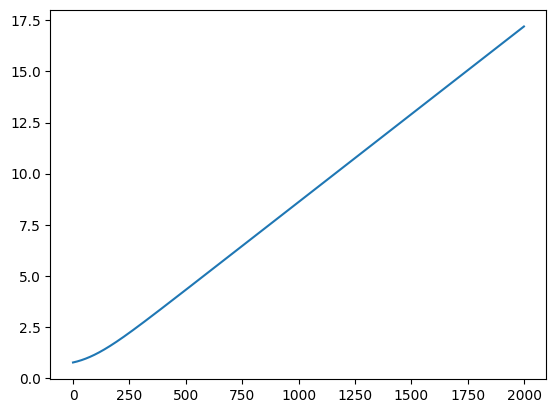

In [27]:
plt.plot(costs)

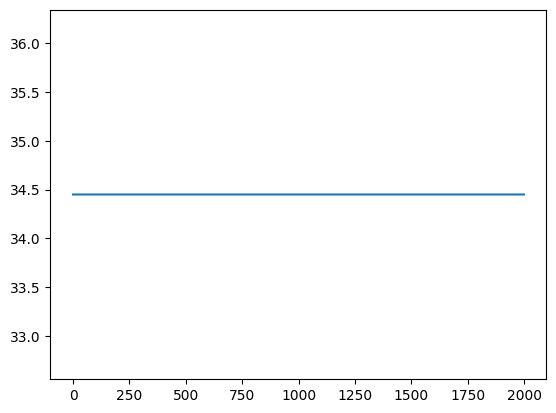

In [28]:
plt.plot(acc_tr)

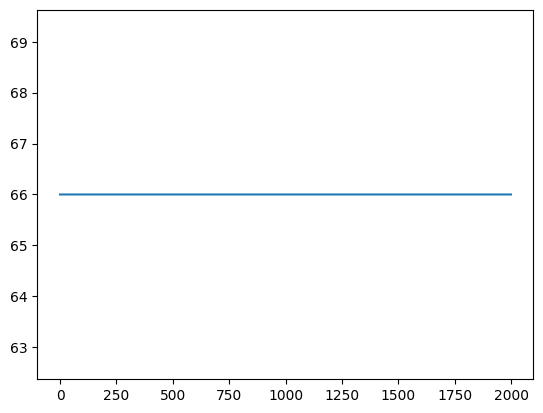

In [29]:
plt.plot(acc_te)

In [31]:
model_2 = model("model_2_tanh",tanh,sigmoid)

In [35]:
costs , acc_tr , acc_te = model_2.train(images_train_sm,labels_train , 2000,0.05,images_test_sm,labels_test)

Streaming output truncated to the last 5000 lines.
 iteration : 1000
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1001
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1002
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1003
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1004
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1005
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1006
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1007
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iter

In [41]:
model_3 = model("model_3_relu",relu,sigmoid)

In [42]:
costs , acc_tr , acc_te = model_3.train(images_train_sm,labels_train , 2000,0.05,images_test_sm,labels_test)

 iteration : 0
 cost : 0.6929735358506692
 train accuracy : 34.44976076555024
 test accuracy : 66.0
 *************************** 
 iteration : 1
 cost : 0.6971051483829253
 train accuracy : 34.44976076555024
 test accuracy : 66.0
 *************************** 
 iteration : 2
 cost : 0.7012778631206614
 train accuracy : 34.44976076555024
 test accuracy : 66.0
 *************************** 
 iteration : 3
 cost : 0.7056242664440616
 train accuracy : 34.44976076555024
 test accuracy : 66.0
 *************************** 
 iteration : 4
 cost : 0.7101656713941247
 train accuracy : 34.44976076555024
 test accuracy : 66.0
 *************************** 
 iteration : 5
 cost : 0.7149923673667361
 train accuracy : 34.44976076555024
 test accuracy : 66.0
 *************************** 
 iteration : 6
 cost : 0.7206447607373151
 train accuracy : 34.44976076555024
 test accuracy : 66.0
 *************************** 
 iteration : 7
 cost : 0.7296644502055364
 train accuracy : 34.44976076555024
 test accura

<ipython-input-18-354e1fcee267>:7: RuntimeWarning: divide by zero encountered in log
  cost = np.sum(-Y*np.log(A2)-(1-Y)*np.log(1-A2))/m
<ipython-input-18-354e1fcee267>:7: RuntimeWarning: invalid value encountered in multiply
  cost = np.sum(-Y*np.log(A2)-(1-Y)*np.log(1-A2))/m
<ipython-input-18-354e1fcee267>:8: RuntimeWarning: divide by zero encountered in divide
  dA2 = -(Y/A2)-((1-Y)/(1-A2))
<ipython-input-18-354e1fcee267>:8: RuntimeWarning: invalid value encountered in divide
  dA2 = -(Y/A2)-((1-Y)/(1-A2))
<ipython-input-18-354e1fcee267>:9: RuntimeWarning: invalid value encountered in multiply
  dZ2 = dA2 * activation2(Z2,True)


Streaming output truncated to the last 5000 lines.
 iteration : 1000
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1001
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1002
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1003
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1004
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1005
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1006
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1007
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iter

In [43]:
model_4 = model("model_3_relu",leaky_relu,sigmoid)

In [45]:
costs , acc_tr , acc_te = model_4.train(images_train_sm,labels_train , 200,0.0005,images_test_sm,labels_test)

 iteration : 0
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 1
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 2
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 3
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 4
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 5
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 6
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 7
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 34.0
 *************************** 
 iteration : 8
 cost : nan
 train accuracy : 65.55023923444976
 test accuracy : 

i dont now why but this show a very bad result from shalow neural net work . maybe i handle it very bad or maybe this is the real reasult . i try to use keras next time for check that is my implemetation is good one or not